# Import libraries

In [1]:
from math import *
import numpy as np
from sympy import Matrix, init_printing,Transpose
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import random

# Styling

In [2]:
%%html
<style>
textarea, input {
    font-family: Cambria Math;
    text-align: center;
}
:root {
    --jp-ui-font-size1: 16px;
}
</style>

# WORK

In [3]:
n = int(input("Number of age classes: "))

Number of age classes: 7


In [4]:
print("Enter 'Birth rate - Survival Rate - Initial population' of each group\nSeperated by white space")
A = Matrix([input().strip().split() for _ in range(n)])
L = Matrix((Matrix(1,n,A.col(0)),Matrix(np.diag([i for i in A.col(1)]))))
L = L[:n,:]
L[-1,-1]=A.col(1)[-1]
N = Matrix(A.col(2))

Enter 'Birth rate - Survival Rate - Initial population' of each group
Seperated by white space
0 0.3 10
0.4 0.7 2
1.8 0.9 8
 1.8 0.9 5
1.8 0.9 12
1.6 0.6 0
0.6 0.0 1


In [5]:
def power(A,n):
    return A**n
print("Leslie matrix: ")
L
print("Initial population: ")
N

Leslie matrix: 


Matrix([
[  0, 0.4, 1.8, 1.8, 1.8, 1.6, 0.6],
[0.3,   0,   0,   0,   0,   0,   0],
[  0, 0.7,   0,   0,   0,   0,   0],
[  0,   0, 0.9,   0,   0,   0,   0],
[  0,   0,   0, 0.9,   0,   0,   0],
[  0,   0,   0,   0, 0.9,   0,   0],
[  0,   0,   0,   0,   0, 0.6,   0]])

Initial population: 


Matrix([
[10],
[ 2],
[ 8],
[ 5],
[12],
[ 0],
[ 1]])

In [6]:
year = int(input("Enter the year to review: "))
if year<1991:
    year = 1991
print(f"Number of individuals in each group in {year}: ")
power(L,year-1990)@N

Enter the year to review: 2022
Number of individuals in each group in 2022: 


Matrix([
[484.789389613458],
[133.132803180503],
[85.3084458192699],
[70.2824597962908],
[57.9037077472845],
[47.7047074205198],
[26.2010952309779]])

Enter number of years (e.g. 100) for examinating population proportions: 150


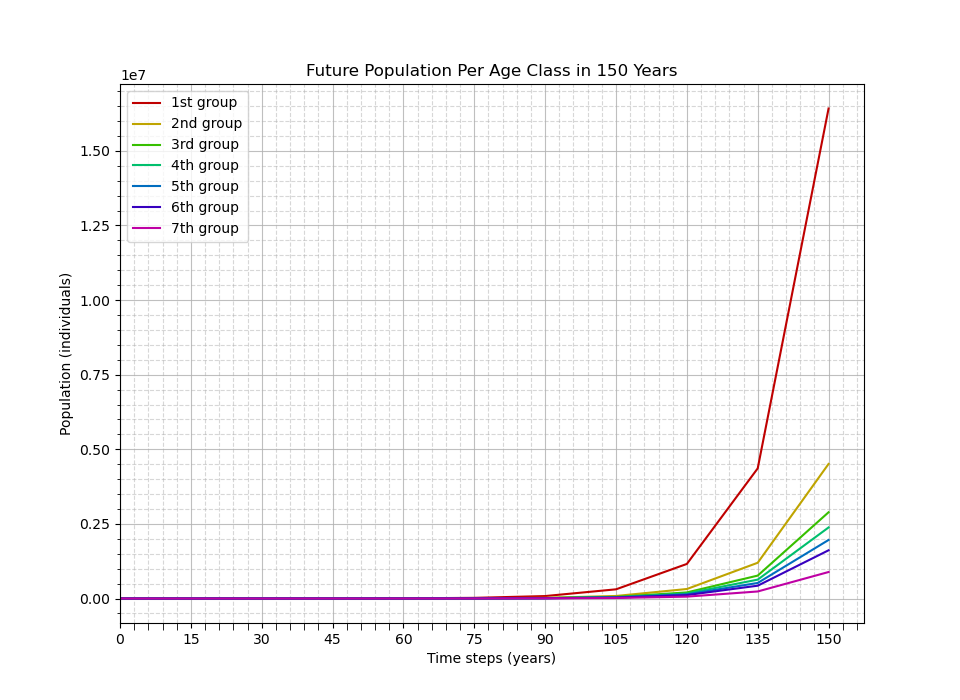

In [8]:
import colorsys
%matplotlib widget
#Some black magic
ordinalGen = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
span = int(input("Enter number of years (e.g. 100) for examinating population proportions: "))
if span<10:
    span = 10
#Graphing
x = [int(i*(span/10)) for i in range(11)]
y = [list(power(L,i)@N) for i in x]
fig,ax = plt.subplots(constrained_layout=False, figsize=(9.6,7));
fig.canvas.toolbar_position = 'bottom';
fig.canvas.header_visible = False;
ax.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
ax.set_xlabel('Time steps (years)');
ax.set_ylabel('Population (individuals)');
ax.set_title(f'Future Population Per Age Class in {span} Years');
ax.minorticks_on();
ax.grid(visible=True, which='major', axis='both', alpha=0.8);
ax.grid(visible=True, which='minor', axis='both', alpha=0.5,linestyle='dashed');
plt.xticks(np.arange(len(x)),x);
ax.autoscale(enable=True, axis='both', tight=None); 
for j in range(len(y[0])):
    ax.plot(list(y[i][j] for i in range(len(y))),label=f"{ordinalGen(j+1)} group",color=colorsys.hsv_to_rgb(j/n+1,1,0.75));
ax.set_xlim(0,auto=True);
ax.legend(loc=2, prop={'size': 10}); 